<a href="https://colab.research.google.com/github/Narad0505/sales-prediction-using-advertising/blob/main/sales-prediction-using-advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You will build a Sales Prediction using Python project in Colab where:

You predict future sales based on advertising spend in TV, Radio and Newspaper.

You clean and explore the data, do transformation and choose the best features.

You use a regression model to forecast sales.

You analyze how changing ad budget impacts sales.

You write business‑level insights for marketing strategy.

 Colab setup and data loading

In [1]:
# 1. Basic setup – import important libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

plt.style.use("seaborn-v0_8")


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising (1).csv


In [3]:
# 3. Read the CSV and see basic information
df = pd.read_csv("Advertising.csv")

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Explanation:

df is your main DataFrame containing all advertising and sales information.

head() lets you quickly see how the data looks.

info() helps you check if there are missing values and data types.

describe() helps you understand ranges and the distribution of each column.

Cleaning, EDA and feature selection

In [4]:
# 4. Check missing values
df.isna().sum()


,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


Explanation:

This tells you how many missing values each column has.

If all values are zero, your dataset is already clean for modeling.

Visual exploration and correlation

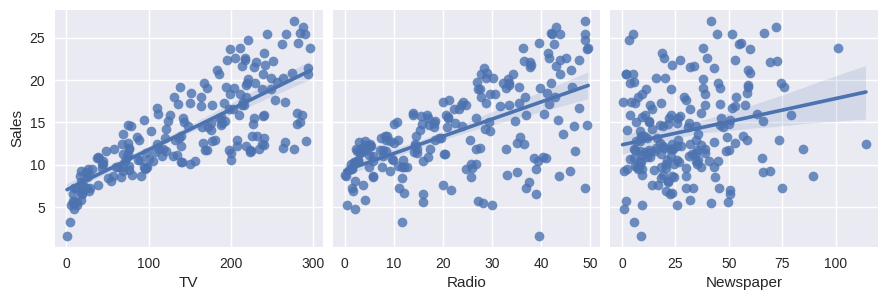

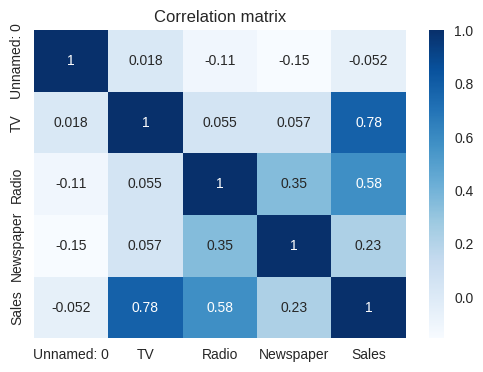

In [5]:
# 5. Pairplot and correlation heatmap
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"],
             y_vars="Sales", height=3, kind="reg")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation matrix")
plt.show()


Explanation:

Pairplot shows scatter plots between each advertising channel and sales with a regression line.

You can visually see which variables have strong positive relation with sales.

The heatmap shows the correlation values between all variables.

If TV and Radio have high positive correlation with Sales, they are strong predictors.

If Newspaper has low or negative correlation with Sales, it contributes less to prediction.

Feature and target selection

In [6]:
# 6. Select features and target
X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]


Explanation:

X contains the columns that will be used to predict sales (independent variables).

y is the column we want to predict (dependent variable).

Optional – remove weak feature

In [7]:
# Optional: use only stronger features if Newspaper is weak
X = df[["TV", "Radio"]]


Explanation:

If analysis shows Newspaper does not help much, you can keep only TV and Radio.

Using fewer but strong features sometimes gives a simpler and better model.

Train–test split and regression model

In [8]:
# 7. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )


Explanation:

The dataset is divided into 80% training data and 20% testing data.

The model learns on the training set and is evaluated on unseen testing data.

random_state keeps the split same every time you run the notebook (for reproducibility).

Train the model

In [9]:
# 8. Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("Intercept:", lin_reg.intercept_)
print("Coefficients:", list(zip(X.columns, lin_reg.coef_)))


Intercept: 3.028255250783305
Coefficients: [('TV', np.float64(0.04472830196637739)), ('Radio', np.float64(0.19066726454072783))]


Explanation:

LinearRegression() creates a linear model where Sales is a linear combination of ad spends.

fit() finds the best intercept and coefficients (slopes) for each feature.

Intercept is the baseline sales when all spends are zero.

Each coefficient tells how much Sales changes when that particular spend increases by 1 unit.

Evaluate performance

In [10]:
# 9. Evaluate model on test data
y_pred = lin_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² score:", r2)
print("RMSE:", rmse)


R² score: 0.9005833101920356
RMSE: 1.7714254173033517


Explanation:

y_pred are the predicted sales for the test set.

R² shows how much of the variance in Sales is explained by the model (closer to 1 is better).

RMSE shows average prediction error; lower values mean more accurate predictions.

Actual vs predicted visualization

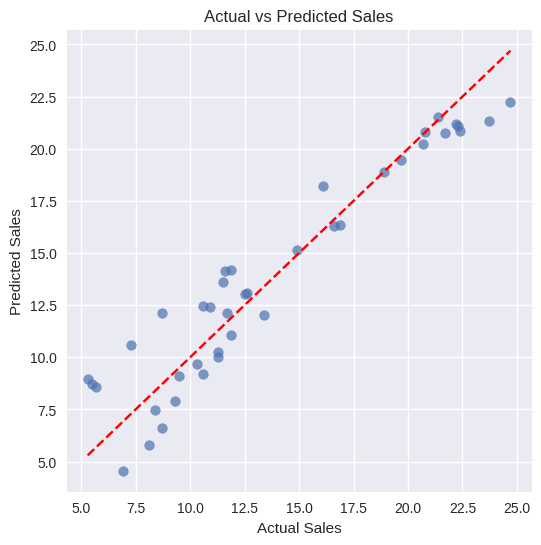

In [11]:
# 10. Plot Actual vs Predicted Sales
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
                  "r--")  # perfect prediction line
plt.show()


Explanation:

Each point represents one test example (actual vs predicted sales).

The red dashed line represents perfect predictions.

Points close to the line indicate good performance; large deviations show errors.

Advertising impact analysis & forecasting

Interpret coefficients (how ads affect sales)

In [12]:
# 11. Understand the impact of each channel
for name, coef in zip(X.columns, lin_reg.coef_):
    print(f"1 unit increase in {name} spend -> {coef:.3f} units increase in Sales (approx)")


1 unit increase in TV spend -> 0.045 units increase in Sales (approx)
1 unit increase in Radio spend -> 0.191 units increase in Sales (approx)


Explanation:

This loop prints how much Sales changes when you increase one feature by 1 unit.

The channel with the highest positive coefficient has the strongest impact on Sales.

If Newspaper’s coefficient is very small or negative, spending there may not be very useful.

Forecast future or hypothetical campaigns

In [13]:
# 12. Predict sales for a new campaign

# Example budget:
# TV = 200, Radio = 25, Newspaper = 20
# Adjust according to your chosen features
new_campaign = pd.DataFrame({
    "TV": [200],
        "Radio": [25],
            "Newspaper": [20]  # remove this line if X uses only TV and Radio
            })

pred_sales = lin_reg.predict(new_campaign[X.columns])[0]
print("Predicted Sales for new campaign:", pred_sales)


Predicted Sales for new campaign: 16.74059725757698


Explanation:

Create a small DataFrame with advertising spends for a new marketing campaign.

Pass it to predict() to get expected Sales.

You can try multiple combinations (e.g., increase TV budget, keep Radio constant) and see how sales might change.

From this, you can write insights like “Invest more in TV and Radio because they bring higher sales per unit spend.”

Business marketing insights (text points you can put in report)
You can write something like this in English in your project report/notebook:

TV and Radio advertising show a strong positive relationship with Sales, indicating they are effective channels for driving revenue.

Newspaper advertising has a comparatively weaker effect on Sales, so the company should carefully evaluate its budget in this channel.

The regression model achieves a good R² score (you will insert actual value), meaning it can explain a high proportion of sales variation based on ad spend.

By simulating different budget scenarios, management can decide an optimal mix of TV and Radio spending to maximize Sales under a fixed total budget.

Overall, the model helps marketing teams to make data‑driven decisions instead of guessing where to invest advertising money.